# Lista 1

#### Aluna: Ingrid Rosselis
#### Matrícula: 2016430936

## Questão 1

Considere uma ação cujo preco atual é $R\$100$. Analistas financeiros concluíram que há duas possibilidades de preço ao final do próximo mês: $R\$105$ e $R\$95$, ambos cenários com probabilidade de $50\%$. Existe a possibilidade de comprar uma opcão de compra desta ação com preço de exercício de $R\$102$ ao final do mês. Atualmente a opção custa $R\$1.60$.

**a.** Considerando uma taxa livre de risco de $0\%$ ao mês, você compraria esta opção? Por quê?

Calcular valor justo da opção desconsiderando taxa livre de risco. Fazer short de uma opção:

$portfolio = 0 (dinheiro\ atual) + P(o,t) (preço\ da\ opção) - 100 * delta (valor\ atual\ da\ ação\ devido) + 100 * delta (dinheiro\ em\ caixa)$

Se em t + 1 ação valer 105 --> exercemos a opção de compra a 102 e temos lucro na venda a 105 de 3 reais:

$portfolio = - 105 * delta + 100 * delta + 3$

Se em t + 1 ação valer 95 --> não exercemos a opção de compra:

$portfolio = - 95 * delta + 100 * delta$

Comparando 2 portfolios para encontrar delta, temos:

$- 105 * delta + 100 * delta + 3 = - 95 * delta + 100 * delta$

$- 105 * delta + 3 = - 95 * delta$

$10 * delta = 3$

$delta = 0.3$

**Reposta:** Recalculando os portfolios percebe-se que a opção de compra deveria valer até $R\$=1.50$ no mês atual para que ela contine, pelo menos, valendo o mesmo no próximo mês. Como a opção custa $R\$=1.60$, eu não compraria a opção.

**b.** Se a taxa de livre de risco for $1\%$ sua decisão mudaria?

Não consegui fazer uma conta que considerei certa (usando a taxa de risco no valor final do portfolio, no valor do preço justo da opção e nos valores da ação para $t + 1$), mas todos os valores que gerei sugeriam um preço justo de opção ainda mais baixo, então minha escolha seria continuar não comprando.

## Questão 2

Considere uma roleta em um cassino que possui números de 1 a 30.  Ao jogar nesta roleta, suponha que uma pessoa escolha um número ímpar e faça sua aposta. Se o crupiê girar a roleta e obtiver um número par, a pessoa perde todo o valor apostado. Se a bolinha parar em um número ímpar, mas diferente daquele escolhido, a pessoa perde metade do valor apostado. Caso a pessoa acerte o número sorteado, ela recebe 50 vezes o valor apostado. O mesmo raciocínio vale se a pessoa escolher um número par. 

Suponha  que esta pessoa possua um capital  disponível $M$, seja viciada em jogos e possua todo o tempo do mundo, isto é, está disposta a apostar na roleta infinitamente.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

proportions = np.arange(0, 1.01, 0.01)

**a.**  Qual porcentagem ideal de $M$ que ela deve apostar de forma a maximizar o retorno esperado deste jogo?  Qual é este retorno esperado?

In [2]:
# dado M = 1, proporção do valor v
# errar número e paridade: p = 15/30
# errar número e acertar paridade: p = 14/30
# acertar número e paridade: p = 1/30

def ma(v):
    return (15/30 * (1 - v) + (14/30 * 0.5 * v) + (1/30 * (50 * v + 1))) - 1

ra = [ma(x) for x in proportions]

print(
    f"Retorno esperado é {max(ra)*100:.2f}% "
    + f"quando investir {proportions[ra.index(max(ra))]*100:.2f}% de seu capital."
)

Retorno esperado é 93.33% quando investir 100.00% de seu capital.


**b.**  O que vai acontecer na prática se ela apostar a proporção obtida acima?

In [3]:
def mg(v):
    return (pow(1 - v, 15/30) * pow(0.5 * v, 14/30) * pow(50 * v + 1, 1/30)) -1 

rg = [mg(x) for x in proportions]

print(f"Retorno esperado se a pessoa investir 100% de seu capital será {rg[-1]*100:.2f}%.")

Retorno esperado se a pessoa investir 100% de seu capital será -100.00%.


**c.**  Qual é aproximadamente a proporção de $M$ que deve ser apostada repetidamente de forma a maximizar os lucros obtidos? 

Não é necessário resolver na letra **(c)** o problema de maximização, apenas achar um valor aproximado.

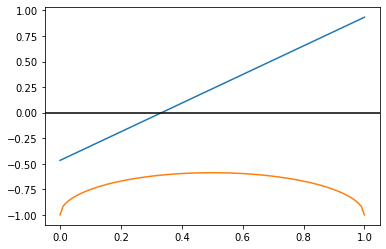

In [4]:
plt.plot(proportions, ra)
plt.axhline(0, color='black')
plt.plot(proportions, rg)

plt.show()

Pelo gráfico gerado, não é possível estimar uma porcentagem que maximizaria os lucros obtidos.

## Questão 3

Considere os preços diários de todos os ativos disponibilizados em 2020 e, separadamente, em 2019 (do primeiro dia de 2019 ao primeiro dia de 2020). Calcule as correlações de cada ativo com o índice IBOV tanto em 2019 quanto em 2020.

In [5]:
import pandas as pd
from datetime import datetime

df = pd.read_csv("data/IBOV.csv")
df["Date"] = pd.to_datetime(df["Date"], format="%Y%m%d")
df = df.set_index("Date")

df.head()

,IBOV,BOVA11,ABEV3,AZUL4,BTOW3,B3SA3,BBAS3,BBSE3,BRML3,BBDC3,...,SANB11,CSNA3,SULA11,SUZB3,TAEE11,TIMP3,TOTS3,USIM5,VALE3,WEGE3
Date,,,,,,,,,,,,,,,,,,,,,
2007-01-02,45382.61,0.0,2.40,0.0,61.20,0.0,10.00,0.0,0.0,6.14,...,0.0,6.37,0.0,0.0,2.06,9.25,2.43,14.70,20.51,0.0
2007-01-03,44445.29,0.0,2.39,0.0,60.35,0.0,9.82,0.0,0.0,6.07,...,0.0,6.17,0.0,0.0,2.12,8.88,2.52,14.19,19.50,0.0
2007-01-04,44019.77,0.0,2.39,0.0,62.46,0.0,10.18,0.0,0.0,6.09,...,0.0,6.02,0.0,0.0,2.10,8.49,2.52,14.02,19.19,0.0
2007-01-05,42245.16,0.0,2.35,0.0,58.88,0.0,9.74,0.0,0.0,5.85,...,0.0,5.85,0.0,0.0,2.06,8.16,2.46,13.30,18.38,0.0
2007-01-08,42829.93,0.0,2.39,0.0,58.28,0.0,9.96,0.0,0.0,6.03,...,0.0,5.95,0.0,0.0,2.08,8.10,2.42,13.43,19.07,0.0


**a.** Em 2019, quais as correlações média, mínima, máxima (e seus respectivos ativos)?

In [6]:
df2019 = df[df.index.year == 2019]

correlations_values_2019 = df2019.corr().drop("IBOV")["IBOV"]
correlations_values_2019

print(f"Média: {correlations_values_2019.mean()}")
print(f"Mínima: {correlations_values_2019.min()}, ativo: {correlations_values_2019.idxmin()}")
print(f"Máxima: {correlations_values_2019.max()}, ativo: {correlations_values_2019.idxmax()}")

Média: 0.620138838185375
Mínima: -0.69828216351592, ativo: BRKM5
Máxima: 0.9997817683247827, ativo: BOVA11


**b.** Em 2020, quais as correlações média, mínima, máxima (e seus respectivos ativos)?

In [7]:
df2020 = df[df.index.year == 2020]

correlations_values_2020 = df2020.corr().drop("IBOV")["IBOV"]
correlations_values_2020

print(f"Média: {correlations_values_2020.mean()}")
print(f"Mínima: {correlations_values_2020.min()}, ativo: {correlations_values_2020.idxmin()}")
print(f"Máxima: {correlations_values_2020.max()}, ativo: {correlations_values_2020.idxmax()}")

Média: 0.8444562110652168
Mínima: 0.24131523755089426, ativo: BTOW3
Máxima: 0.9998947745052927, ativo: BOVA11


**c.** Plote também dois histogramas com as correlações de todos os ativos com índice, um para 2019 e outro 2020.  Ajuste o eixo $X$ para mostrar de -1 a 1, e o eixo $Y$ para que seja igual para os dois casos. Qual interpretação você tira dessa análise?

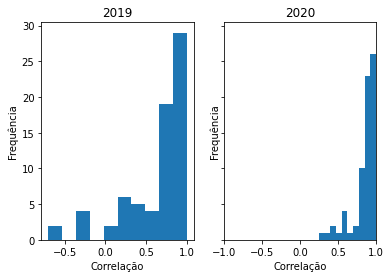

In [8]:
_, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True)

ax1.hist(correlations_values_2019)
ax1.set_title("2019")
ax1.set_xlabel("Correlação")
ax1.set_ylabel("Frequência")

ax2.hist(correlations_values_2020)
ax2.set_title("2020")
ax2.set_xlabel("Correlação")
ax2.set_ylabel("Frequência")

plt.xlim(-1, 1)

plt.show()

Analisando os dois gráficos percebemos que em 2020 os valores de correlações são todos positivos, mas as correlações positivas mais fortes podem ser vistas com maior frequência em 2019.

## Questão 4

A partir dos dados diários da Bovespa disponibilizados, obtenha os 250 retornos mais recentes (simbolizando mais ou menos 1 ano em dias úteis). Considere um portfolio igualmente distribuído nos ativos BOVA11,PETR4, ABEV3, SUZB3 e ITSA4. 

In [9]:
stocks = ["BOVA11", "PETR4", "ABEV3", "SUZB3", "ITSA4"]

df = pd.read_csv("data/IBOV.csv")
df["Date"] = pd.to_datetime(df["Date"], format="%Y%m%d")
df = df[stocks].tail(250)

df["Portfolio"] = df.mean(axis=1)
display(df.head())

,BOVA11,PETR4,ABEV3,SUZB3,ITSA4,Portfolio
3112,99.05,24.89,20.10,30.40,12.15,37.318
3113,100.36,25.62,19.65,31.10,12.27,37.800
3114,100.24,25.55,19.56,30.46,12.21,37.604
3115,98.16,24.94,18.98,30.84,11.78,36.940
3116,99.52,25.27,18.88,32.65,12.08,37.680


Complete a tabela abaixo:

In [10]:
results = pd.DataFrame(columns=["Asset", "Expected Return", "Std. deviation", "Skewnees", "Kurtois", "VaR 5%"])

for stock in stocks + ["Portfolio"]:
    r = df[stock].pct_change().dropna()
    er = r.sum()
    std = df[stock].std()
    ske = df[stock].skew()
    kur = df[stock].kurtosis()
    var = r.quantile(0.05)
    
    results = results.append({
        "Asset": stock, 
        "Expected Return": er, 
        "Std. deviation": std, 
        "Skewnees": ske, 
        "Kurtois": kur, 
        "VaR 5%": var
    }, ignore_index=True)
    
    
results

,Asset,Expected Return,Std. deviation,Skewnees,Kurtois,VaR 5%
0,BOVA11,0.103951,12.999211,-0.722211,-0.403539,-0.036787
1,PETR4,0.156659,5.161542,-0.613684,-0.678926,-0.039129
2,ABEV3,-0.324205,2.709840,-0.337875,-1.412050,-0.040954
3,SUZB3,0.568452,4.550136,-0.194252,-0.043587,-0.050224
4,ITSA4,-0.074005,1.724307,-0.433160,-1.253511,-0.045359
5,Portfolio,0.113385,4.623736,-0.616034,-0.211960,-0.027575


Tanto faz usar o desvio padrão da amostra ou da população. Para o Value-at-Risk $5\%$, considere o caso não paramétrico. O $VaR$ não paramétrico não supõe nenhuma distribuição para os retornos, apenas assume que os dados históricos representam uma distribuição discreta dos possíveis retornos futuros, todos com probabilidades iguais, e calcula o $VaR$ a partir destes dados. Além da tabela, discuta alguns aspectos:

- Ao calcular o $VaR$ você verá que a resposta não é tão óbvia. Explique como você definiu o valor a ser utilizado.
- O que os valores da curtose sugerem.
- Como o portfolio se compara com o ativos individuais em relação ao risco esperado.